Vodeni zig (eng. watermark) je jedan od nacina da se zastite digitalne fotografije od neovlascenih upotreba. Mogu biti vidljivi ili nevidljivi za krajnje korisnike.  

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from __future__ import division
%matplotlib inline

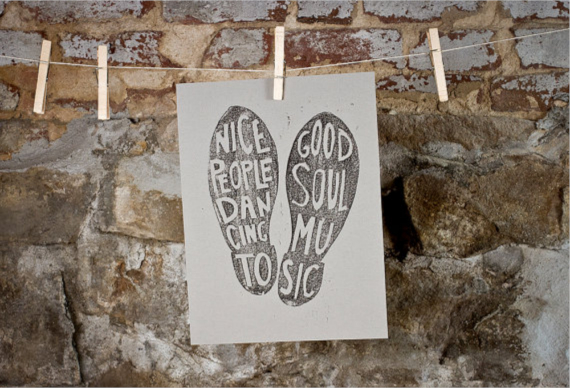

In [20]:
img1 = Image.open('dance.jpg')
img1

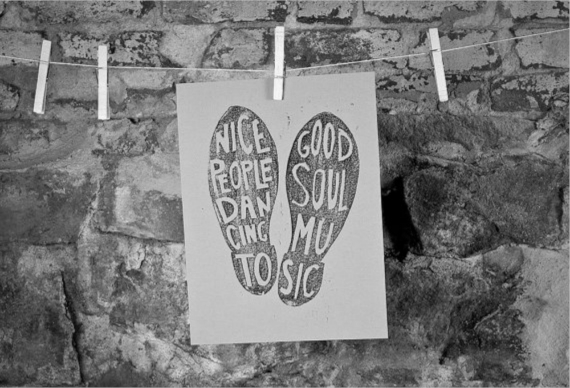

In [21]:
img2 = Image.open('dance.jpg').convert('L')
img2

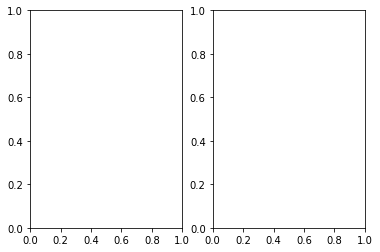

In [22]:
f, (axis_original, axis_grayscale) = plt.subplots(1, 2)

In [23]:
axis_original.imshow(img1)
axis_original.set_title("Original")
axis_original.set_xticks([])
axis_original.set_yticks([])

[]

In [24]:
axis_grayscale.imshow(img2, cmap='gray')
axis_grayscale.set_title("Grayscale")
axis_grayscale.set_xticks([])
axis_grayscale.set_yticks([])

[]

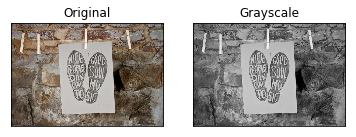

In [25]:
f

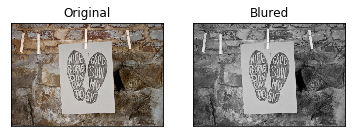

In [26]:
plt.subplot(121),plt.imshow(img1)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img2, cmap = 'gray')
plt.title('Blured'), plt.xticks([]), plt.yticks([])
plt.show()

In [27]:
# ideja je izmeniti frekvencijski spektar slike tako da je promena nevidljiva ljudskom oku
# dodacemo neke male vestacke frekvencije
# ali koje opet mozemo dektektovati ako znamo gde da gledamo
# vodeni zig u nasem slucaju ce biti kruznica na kojoj su slucajno rasporedjene 0 ili 1 vrednosti

In [40]:
import random
import math

/home/termninja/matf/master/naucno_izracunavanje/vezbe/mr_furije_nastavak/watermark


In [29]:
def random_vector(seed, length):
    """ Funkcija generise niz zadate duzine ciji su elementi slucajno odabrane ili nule ili jedinice """
    random.seed(seed)
    return [random.choice([0,1]) for _ in np.arange(length)]

In [30]:
random_vector(1, 10)

[0, 1, 1, 0, 0, 0, 1, 1, 0, 0]

In [31]:
def makeWatermark(image_shape, radius, secretKey, vectorLength=50):
    """ Funkcija generise zig u vidu kruznice zadatog poluprecnika na kojoj se nalazi zadati broj tacaka"""
    watermark = np.zeros(image_shape)
    center = (int(image_shape[0] / 2) + 1, int(image_shape[1] / 2) + 1)
    
    vector = random_vector(secretKey, vectorLength)
    
    x = lambda t: center[0] + int(radius * math.cos(t * 2 * math.pi / vectorLength))
    y = lambda t: center[1] + int(radius * math.sin(t * 2 * math.pi / vectorLength))
    indices = [(x(t), y(t)) for t in range(vectorLength)]
    
    
    for i, location in enumerate(indices):
        watermark[location] = 1
        
    return watermark

In [32]:
# slika za dalja testiranja
img = np.array(Image.open('dance.jpg').convert('L'))

In [33]:
# Za iscrtavanje vodenog ziga promeniti vrednost 1 u liniji watermark[location]=1 na npr. 50
# watermark = makeWatermark(img.shape, 50, 6, 100)
# Image.fromarray(watermark).show()

In [36]:
watermark = makeWatermark(img.shape, 100, 17, 200)

In [37]:
def applyWatermark(imageMatrix, watermarkMatrix, alpha):
    """ Funkcija koja kombinuje vodeni zig i frekvencijski spektar slike """
    shiftedDFT = np.fft.fftshift(np.fft.fft2(imageMatrix))
    watermarkedDFT = shiftedDFT + alpha * watermarkMatrix
    watermarkedImage = np.fft.ifft2(np.fft.ifftshift(watermarkedDFT))
    
    return np.abs(watermarkedImage)

In [38]:
# za velike vrednosti parametra alfa mogu da se vide promene na slici
img_watermarked = applyWatermark(img,  watermark, 4)

In [39]:
img_watermarked = Image.fromarray(img_watermarked)
img_watermarked.show()